[필사 링크](https://www.tensorflow.org/tutorials/keras/classification)

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


In [2]:
# 10개의 범주와 70,000개의 흑백 이미지로 구성
# 해상도 : 28x28
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# 0부터 9까지 숫자에 대응하는 label
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 
               'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

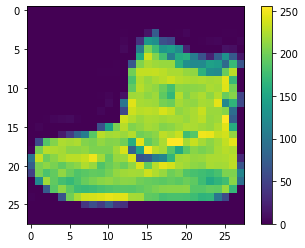

In [7]:
# 픽셀 값의 범위가 0 ~ 255 사이라는 것을 알 수 있음 
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
# 신경망 모델에 주입하기 전 픽셀의 범위를 0 ~ 1 사이로 조정
train_images = train_images / 255.0
test_images = test_images / 255.0

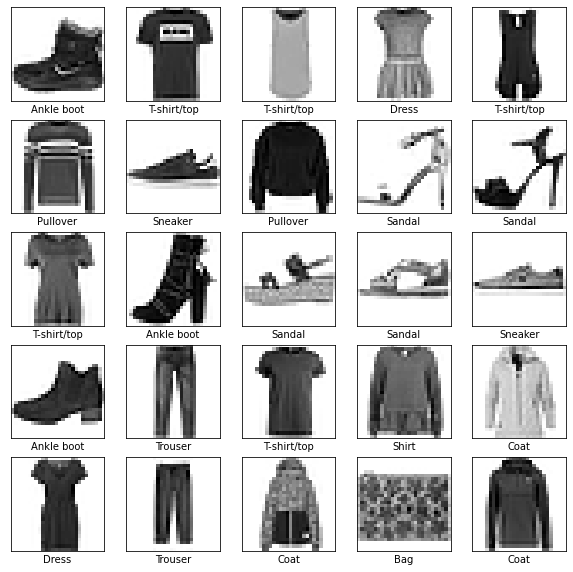

In [9]:
# 25개의 이미지와 그에 맞는 label 출력
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

[Sequential 공식문서](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)

In [10]:
model = tf.keras.Sequential([
    # Flatten은 2차원 배열(28 x 28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환
    # 픽셀의 행을 펼쳐 일렬로 늘림
    # 학습되는 가중치는 없고, 데이터를 변환하기만 함
    tf.keras.layers.Flatten(input_shape=(28, 28)), 

    # 픽셀을 펼친 후 Dense 층이 연속되어 연결
    # 첫 Dense 층은 128개의 노드(뉴런)를 가짐
    tf.keras.layers.Dense(128, activation='relu'),

    # 두 번째 Dense는 10개 노드를 가진 소프트맥스 층
    # 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력
    tf.keras.layers.Dense(10)])

In [14]:
# 옵티마이저 설정 : 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식
model.compile(optimizer='adam',
              
              # 손실 함수 : 모델이 얼마나 정확한지 측정, 이 함수를 최소화하는 것이 목적
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),

              # 올바르게 분류된 이미지의 비율인 정확도를 사용
              metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5021 - accuracy: 0.8229
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3760 - accuracy: 0.8627
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3358 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3143 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2951 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2792 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2700 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2601 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2472 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [16]:
# 정확도 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3395 - accuracy: 0.8805 - 678ms/epoch - 2ms/step

Test accuracy: 0.8805000185966492


In [17]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    # np.argmax()
    # 가장 큰 원소의 index 반환
    # 여러 개일 경우 가장 앞에 있는 index 반환
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 
                                         100*np.max(predictions_array), 
                                         class_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

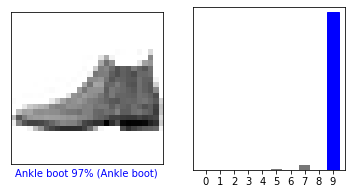

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

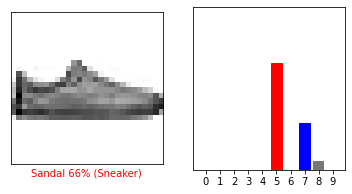

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

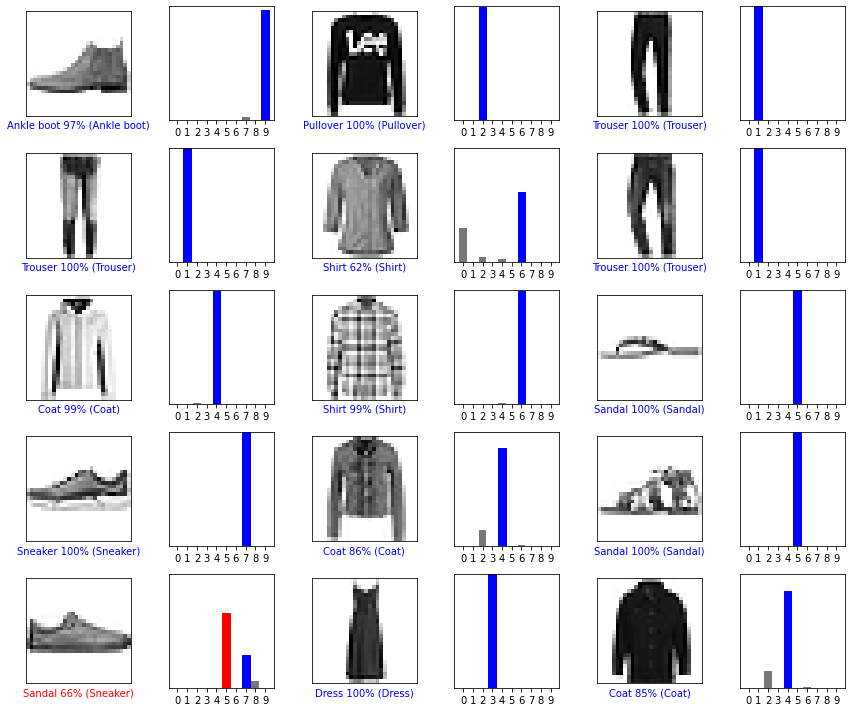

In [24]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [25]:
img = test_images[1]

print(img.shape)

(28, 28)


In [26]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 14ms/step
[[1.0610927e-05 5.1608452e-13 9.9867094e-01 1.0365287e-10 1.2704446e-03
  6.4120324e-12 4.7952133e-05 8.5739804e-16 6.3145595e-09 1.3521582e-15]]


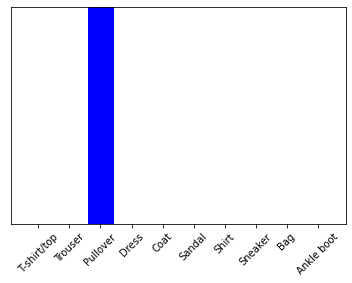

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [29]:
np.argmax(predictions_single[0])

2